<a href="https://colab.research.google.com/github/MairaGrijalba/GrijalbaM-ProyectoFinal-DataScience/blob/main/Grijalba_Maira_%2B_Proyecto_Final_Data_Science_III.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Conjunto de datos de quejas de consumidores para PNL**
Contexto
La Oficina de Protección Financiera del Consumidor (CFPB) es una agencia federal de EE. UU. que actúa como mediadora cuando surgen disputas entre instituciones financieras y consumidores. A través de un formulario web, los consumidores pueden enviar a la agencia una descripción de su disputa. Un modelo de PNL haría que la clasificación de las quejas y su envío a los equipos apropiados fuera más eficiente que las quejas etiquetadas manualmente.

Contenido
Se descargó un archivo de datos directamente del sitio web del CFPB para entrenar y probar el modelo. Incluía datos de un año (marzo de 2020 a marzo de 2021). Más adelante en el proyecto, utilicé una API para descargar datos actualizados para verificar el rendimiento del modelo.

Cada envío fue etiquetado con una de las nueve clases de productos financieros. Debido a las similitudes entre ciertas clases, así como a algunos desequilibrios de clases, las consolidé en cinco clases:

Informes de crédito
Cobro de deudas
Hipotecas y préstamos (incluye préstamos para automóviles, préstamos de día de pago, préstamos para estudiantes, etc.)
Tarjetas de crédito
Banca minorista (incluye cuentas corrientes/de ahorro, así como transferencias de dinero, Venmo, etc.)
Después de la limpieza de datos, el conjunto de datos constaba de alrededor de 499 envíos de consumidores que contenían narrativas.

**Consumer Complaints Dataset for NLP**
Context
The Consumer Financial Protection Bureau (CFPB) is a federal U.S. agency that acts as a mediator when disputes arise between financial institutions and consumers. Via a web form, consumers can send the agency a narrative of their dispute. An NLP model would make the classification of complaints and their routing to the appropriate teams more efficient than manually tagged complaints.

Content
A data file was downloaded directly from the CFPB website for training and testing the model. It included one year's worth of data (March 2020 to March 2021). Later in the project, I used an API to download up-to-the-minute data to verify the model's performance.

Each submission was tagged with one of nine financial product classes. Because of similarities between certain classes as well some class imbalances, I consolidated them into five classes:

Credit reporting
Debt collection
Mortgages and loans (includes car loans, payday loans, student loans, etc.)
Credit cards
Retail banking (includes checking/savings accounts, as well as money Transfers, Venmo, etc.)
After data cleaning, the dataset consisted of around 499 consumer submissions containing narratives.
https://www.kaggle.com/datasets/shashwatwork/consume-complaints-dataset-fo-nlp

https://www.consumerfinance.gov/data-research/consumer-complaints/#download-the-data

Cuenta con 13 columnas:
**Complaint ID:** Numero de identificacion de la queja.

**Date received:** Fecha de recibido.  **Product**: Producto.

**Sub-Product: **Sub-producto. **Issue:** problema. **Sub-issue:** Sub-problema.

**Consumer complaint narrative:** Narrativa de queja del consumidor.
**Company:** Compañia. **State:** Estado. **Submitted via:** Enviado via.

**Date sent to company:** Fecha enviado a la compañia.

**Company response to cunsumer:** Respuesta de la compañia al consumidor.

**Timely response:** Respuesta oportuna.


In [ ]:
import os
import matplotlib.pyplot as plt
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.util import ngrams
import numpy as np
import pandas as pd
from pylab import rcParams
from wordcloud import WordCloud, STOPWORDS
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
!pip install spacy
!python -m spacy download en_core_web_sm
import spacy
from collections import Counter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 77.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
url='https://raw.githubusercontent.com/MairaGrijalba/GrijalbaM-ProyectoFinal-DataScience/refs/heads/main/Complaints%20Normalizada.csv'
df= pd.read_csv(url)

In [ ]:
df.head(5)

,Complaint ID,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Rating
0,11092096,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Experian Information Solutions Inc.,NY,Web,12/10/2024,In progress,Yes,3
1,11092099,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"EQUIFAX, INC.",NY,Web,12/10/2024,In progress,Yes,2
2,11092100,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,"EQUIFAX, INC.",FL,Web,12/10/2024,In progress,Yes,3
3,11092101,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Problem with personal statement of dispute,"EQUIFAX, INC.",CA,Web,12/10/2024,In progress,Yes,3
4,11092102,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",AL,Web,12/10/2024,In progress,Yes,5


In [ ]:
df.shape

(499, 13)

In [ ]:
# Veamos cuántas quejas por empresa tenemos
print("\nCantidad de quejas  por empresa:")
print(df['Company'].value_counts())


Cantidad de quejas  por empresa:
Company
Experian Information Solutions Inc.                    190
EQUIFAX, INC.                                          130
TRANSUNION INTERMEDIATE HOLDINGS, INC.                 111
LEXISNEXIS                                               9
CAPITAL ONE FINANCIAL CORPORATION                        7
Resurgent Capital Services L.P.                          5
CrossCheck, Inc.                                         2
Early Warning Services, LLC                              2
ALLY FINANCIAL INC.                                      2
Nelnet, Inc.                                             1
TMX Finance LLC                                          1
HCFS Healthcare Financial Services of TeamHealth         1
Adler Wallach & Associates, Inc.                         1
TRANSWORLD SYSTEMS INC                                   1
AMERICAN EXPRESS COMPANY                                 1
Ability Recovery Services, LLC                           1
BANK OF AMERIC

Podemos observar 53 empresas donde 44 empresas solo recibieron una queja esto puede sucede por dos motivos porque son empresas mas pequeñas pro ende recibe menos quejas y/o tienen mejor servicio en estos productos financieron hay tres empresas que recibieron 2 quejas de estas 499 quejas, otras tres empresas recibieron 5, 7 y 9 quejas succesivamente, y las tres empresas que recibieron mas quejas y ne las cuales nos enfocaremos son =: Experian Information Solutions Inc. con 190 quejas, EQUIFAX INC. con 130 quejas TRANSUNION INTERMEDIATE HOLDINGS, INC. 111 estas tres empresas suman un 86.17% de todas las quejas de este estudio.

In [ ]:
# Filtramos sólo las quejas para Experian Information Solutions Inc.
EIS_quejas = df[df['Company'] == 'Experian Information Solutions Inc.']

# Vemos las primeras filas del nuevo DataFrame filtrado
print(EIS_quejas.head())

# Confirmamos la cantidad de quejas que quedaron en el filtro
print(f"Cantidad de quejas para Experian Information Solutions Inc: {len(EIS_quejas)}")

    Complaint ID Date received  \
0       11092096    12/10/2024   
11      10904044    11/23/2024   
14      11092140    12/10/2024   
17      10903641    11/23/2024   
20      10872982    11/20/2024   

                                              Product       Sub-product  \
0   Credit reporting or other personal consumer re...  Credit reporting   
11  Credit reporting or other personal consumer re...  Credit reporting   
14  Credit reporting or other personal consumer re...  Credit reporting   
17  Credit reporting or other personal consumer re...  Credit reporting   
20                                    Debt collection     I do not know   

                                                Issue  \
0   Problem with a company's investigation into an...   
11               Incorrect information on your report   
14               Incorrect information on your report   
17               Incorrect information on your report   
20                  Attempts to collect debt not owed   

 

# **ANALISIS EXPLORATORIO**
 **Análisis de valores nulos**

In [ ]:
print("\nValores faltantes por columna:")
print(EIS_quejas.isnull().sum())


Valores faltantes por columna:
Complaint ID                    0
Date received                   0
Product                         0
Sub-product                     0
Issue                           0
Sub-issue                       0
Company                         0
State                           0
Submitted via                   0
Date sent to company            0
Company response to consumer    0
Timely response?                0
Rating                          0
dtype: int64


No se observan datos nulos.

Distribución de quejas por estado para Experian Information Solutions Inc.

In [ ]:
EIS_quejas.Rating.value_counts()

,count
Rating,
3,47
4,40
5,40
2,38
1,25


In [ ]:
percent_val = 100 * EIS_quejas.Rating.value_counts()/EIS_quejas.shape[0]
percent_val

,count
Rating,
3,24.736842
4,21.052632
5,21.052632
2,20.000000
1,13.157895


Distribución de quejas por producto para Experian Information Solutions Inc.

Text(0, 0.5, 'Porcentaje (%)')

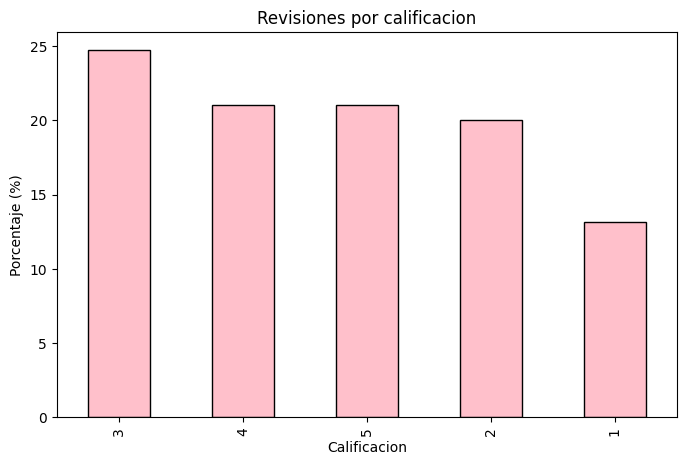

In [ ]:
plt.figure(figsize=(8, 5))
percent_val.plot.bar(edgecolor='black', color='pink')
plt.title('Revisiones por calificacion')
plt.xlabel('Calificacion')
plt.ylabel('Porcentaje (%)')

In [ ]:
EIS_quejas.Product.value_counts()

,count
Product,
Credit reporting or other personal consumer reports,177
"Credit reporting, credit repair services, or other personal consumer reports",9
Debt collection,3
Credit card,1


In [ ]:
percent_val = 100 * EIS_quejas.Product.value_counts()/EIS_quejas.shape[0]
percent_val

,count
Product,
Credit reporting or other personal consumer reports,93.157895
"Credit reporting, credit repair services, or other personal consumer reports",4.736842
Debt collection,1.578947
Credit card,0.526316


Text(0, 0.5, 'Porcentaje (%)')

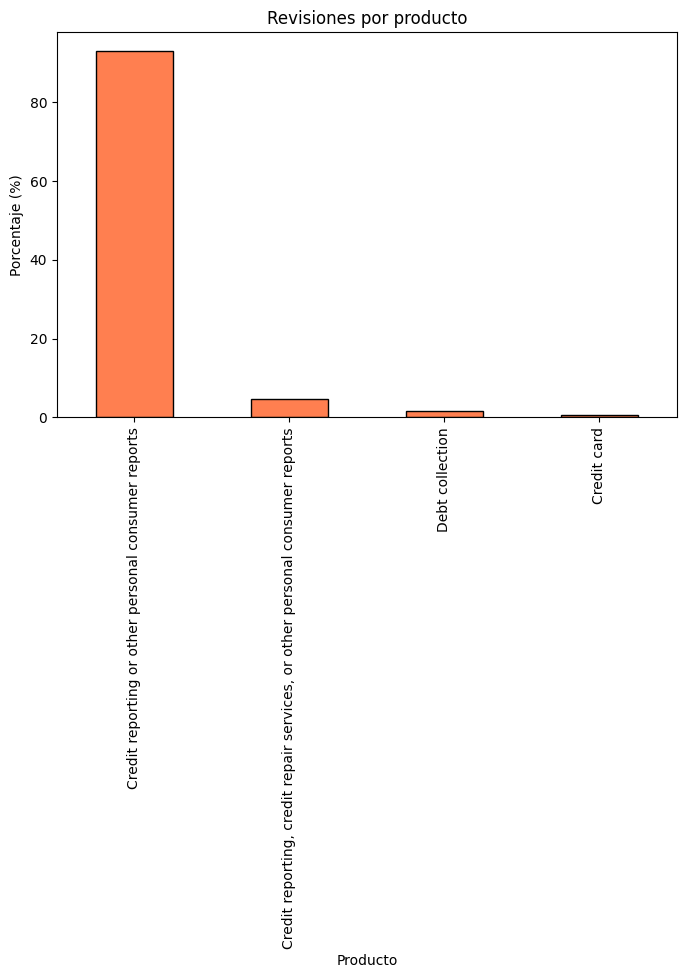

In [ ]:
plt.figure(figsize=(8, 5))
percent_val.plot.bar(edgecolor='black', color= 'coral')
plt.title('Revisiones por producto')
plt.xlabel('Producto')
plt.ylabel('Porcentaje (%)')

Podemos observar como la mayoria de quejas con mas del 93% de todas las quejas es por reporte de credito u otro requerimiento personal

**Análisis de la Longitud de las Oraciones**

In [ ]:
import re
from nltk.stem import WordNetLemmatizer


# Descargamos stopwords y WordNet

nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer() # Lematizamos (reducimos cada palabra a su forma base)
stop_words = set(stopwords.words('english'))

# Limpiamos y preprocesamos el texto
def preprocess_text(text):
    text = re.sub(r'<.*?>', '', text)  # Eliminamos HTML
    text = re.sub(r'[^\w\s]', '', text)  # Eliminamos puntuación
    tokens = [lemmatizer.lemmatize(word.lower()) for word in text.split() # Convertimos mayúsculas a minúsculas y tokenizamos
              if word.lower() not in stop_words] # Eliminamos stopwords
    return ' '.join(tokens)

# Aplicamos la función de preprocesamiento solo en la columna review_text
EIS_quejas['cleaned_review'] = EIS_quejas['Sub-issue'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-74-25b526472206>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EIS_quejas['cleaned_review'] = EIS_quejas['Sub-issue'].apply(preprocess_text)


Text(0, 0.5, 'Frecuencia')

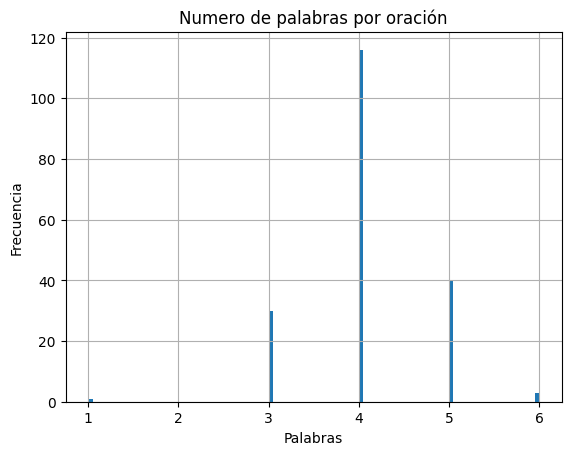

In [ ]:
#Numero de palabras por oración
words_per_review = EIS_quejas.cleaned_review.apply(lambda x: len(x.split(" ")))
words_per_review.hist(bins = 100)
plt.title('Numero de palabras por oración')
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')

In [ ]:
words_per_review.mean()


4.068421052631579

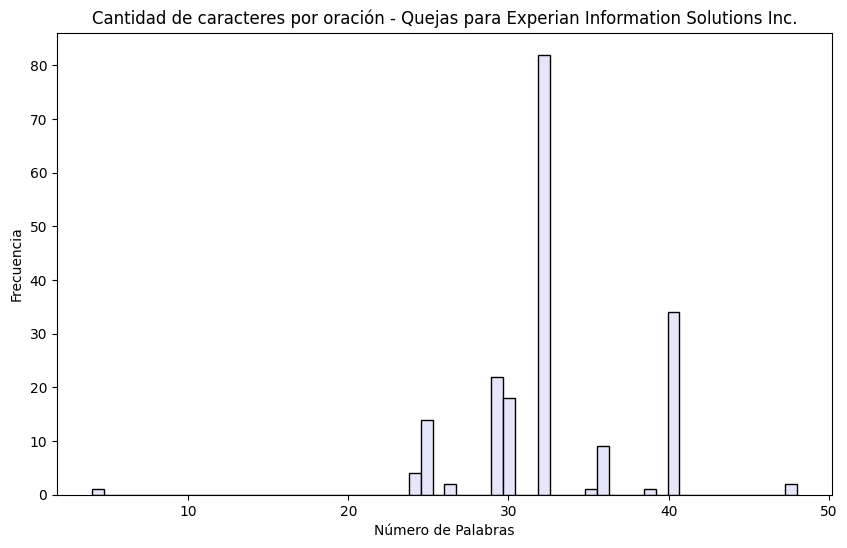

In [ ]:
# Cantidad de caracteres por oración
sentence_lengths = [len(sentence) for sentence in EIS_quejas['cleaned_review']]

plt.figure(figsize=(10, 6))
plt.hist(sentence_lengths, bins=60, edgecolor='black', color='lavender')
plt.title('Cantidad de caracteres por oración - Quejas para Experian Information Solutions Inc.')
plt.xlabel('Número de Palabras')
plt.ylabel('Frecuencia')
plt.show()


**Análisis de la Frecuencia de Palabras**

In [ ]:

# Contamos las palabras en nuestro texto ya procesado
all_words = ' '.join(EIS_quejas['cleaned_review']).split()
word_counts = Counter(all_words)

# Convertimos el conteo a un DataFrame para facilitar el análisis
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

# Mostramos las 20 palabras más comunes
print(word_counts_df.head(20))

             Word  Frequency
5     information        111
9            else         82
7         belongs         82
8         someone         82
3          report         58
15        company         34
17     improperly         34
16           used         34
14      reporting         34
0   investigation         32
6       incorrect         28
4         account         26
2           error         16
1             fix         16
12             30         14
13            day         14
11           took         14
23         status          6
24         credit          6
25        inquiry          5


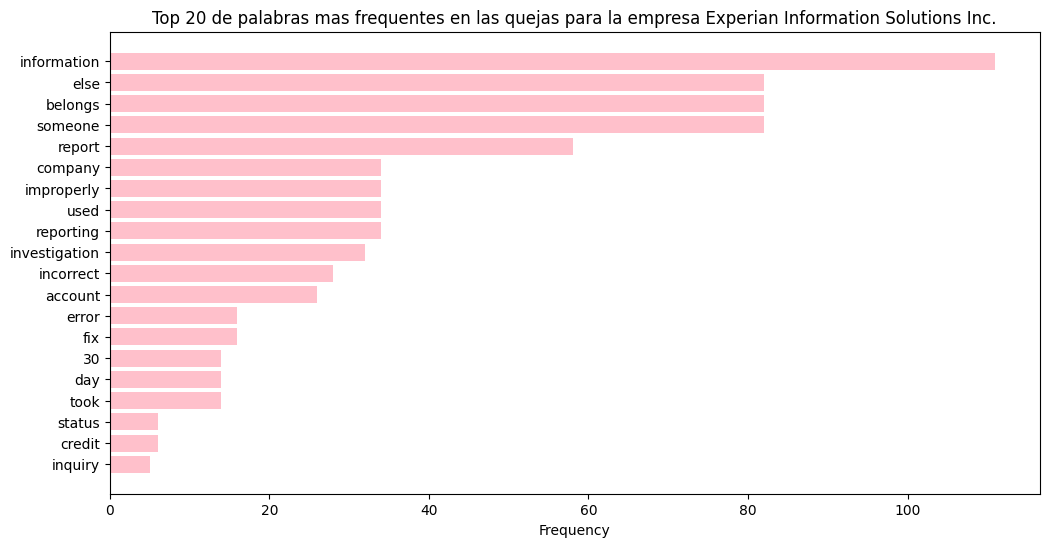

In [ ]:
# Gráfico de barras de las 20 palabras más comunes
top_words = word_counts_df.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_words['Word'], top_words['Frequency'], color='pink')
plt.xlabel('Frequency')
plt.title('Top 20 de palabras mas frequentes en las quejas para la empresa Experian Information Solutions Inc.')
plt.gca().invert_yaxis()  # Invertir el eje y para mostrar la palabra más frecuente en la parte superior
plt.show()


Como palabras como ** used belongs someone else** no aportan las vamos a sacar

             Word  Frequency
5     information        111
3          report         58
15        company         34
17     improperly         34
14      reporting         34
0   investigation         32
6       incorrect         28
4         account         26
2           error         16
1             fix         16
12             30         14
13            day         14
11           took         14
23         status          6
24         credit          6
25        inquiry          5
27      recognize          5
26           dont          5
10           debt          3
33         public          2


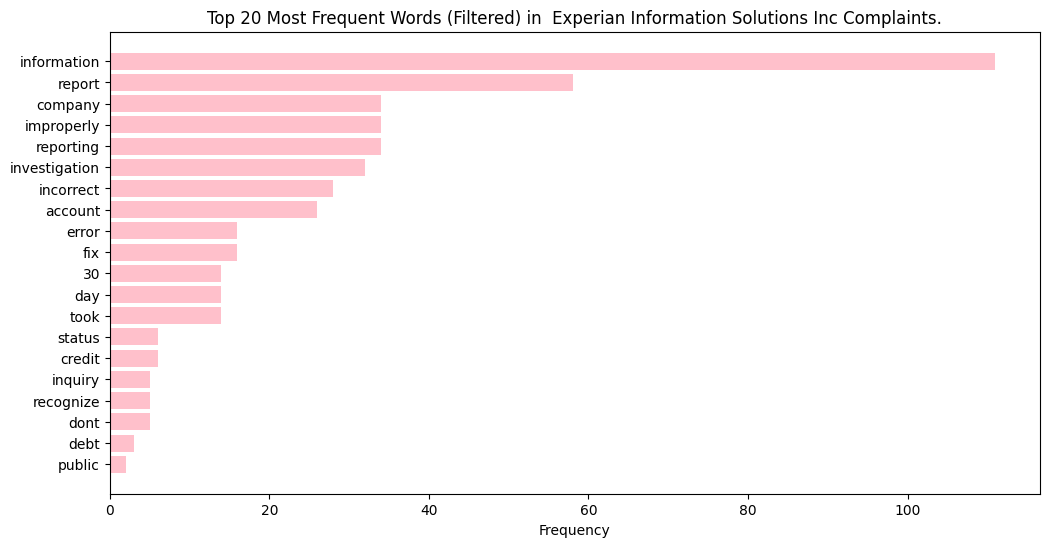

In [ ]:
# Lista de palabras a eliminar
stop_words_custom = {'used', 'belongs', 'someone', 'else'}

# Filtramos el DataFrame para eliminar las palabras no deseadas
filtered_word_counts_df = word_counts_df[~word_counts_df['Word'].isin(stop_words_custom)]

# Mostramos las 20 palabras más comunes después de la filtración
print(filtered_word_counts_df.head(20))

# Graficamos las 20 palabras más comunes después de la filtración
top_filtered_words = filtered_word_counts_df.head(20)

plt.figure(figsize=(12, 6))
plt.barh(top_filtered_words['Word'], top_filtered_words['Frequency'], color='pink')
plt.xlabel('Frequency')
plt.title('Top 20 Most Frequent Words (Filtered) in  Experian Information Solutions Inc Complaints.')
plt.gca().invert_yaxis()  # Invertir el eje y
plt.show()

**Análisis de las Partes del Discurso (POS)**

Las 10 partes del discurso más comunes: [('NOUN', 1126), ('PROPN', 885), ('SPACE', 309), ('PRON', 239), ('CCONJ', 210), ('VERB', 139), ('DET', 122), ('X', 85), ('PART', 68), ('ADV', 32)]


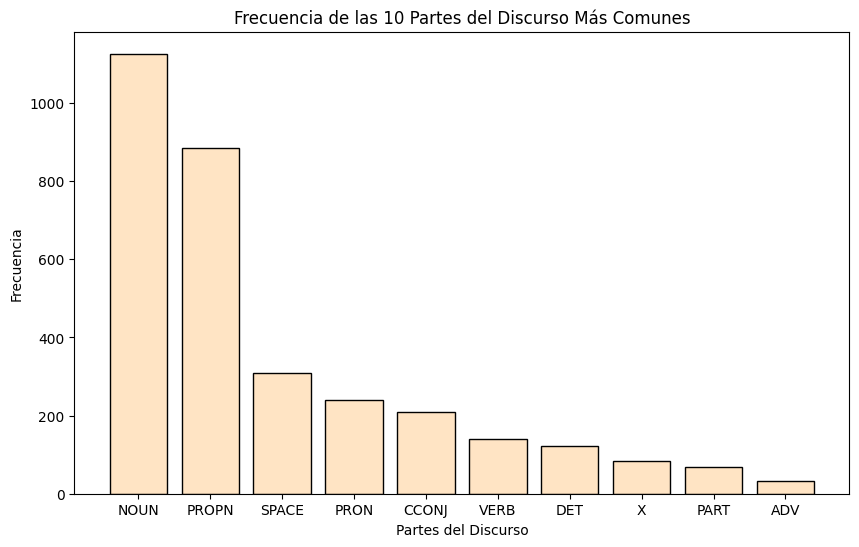

In [ ]:
# Cargamos el modelo de spaCy en inglés
nlp = spacy.load('en_core_web_sm')
# Función para obtener las partes del discurso (POS)
def pos_tagging(sentence):
    doc = nlp(" ".join(sentence))
    return [(token.text, token.pos_) for token in doc]

# Aplicamos POS tagging (sólo con 100 reviews porque sino tarda mucho en ejecutar)
pos_tagged_corpus = [pos_tagging(sentence) for sentence in EIS_quejas['cleaned_review'][:100]]

# Contamos la frecuencia de las partes del discurso
pos_counts = Counter([pos for sentence in pos_tagged_corpus for _, pos in sentence])

# Mostramos las partes del discurso más comunes
most_common_pos = pos_counts.most_common(10)
print("Las 10 partes del discurso más comunes:", most_common_pos)

# Gráfico de las partes del discurso más comunes
pos, counts = zip(*most_common_pos)
plt.figure(figsize=(10, 6))
plt.bar(pos, counts,  edgecolor='black', color='bisque')
plt.title('Frecuencia de las 10 Partes del Discurso Más Comunes')
plt.xlabel('Partes del Discurso')
plt.ylabel('Frecuencia')
plt.show()

Análisis de la Distribución de Longitud de Palabras

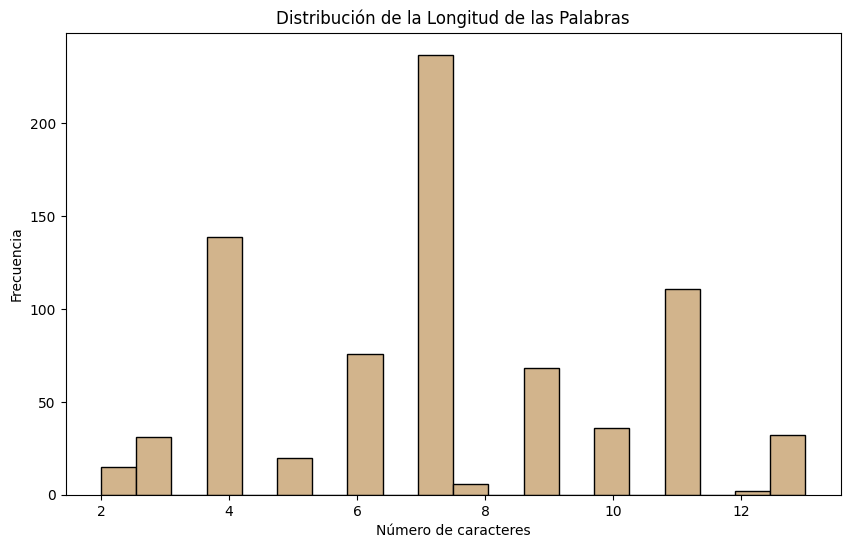

In [ ]:

# Longitud de las palabras
word_lengths = [len(word) for word in all_words]

plt.figure(figsize=(10, 6))
plt.hist(word_lengths, bins=20, edgecolor='black', color='tan')
plt.title('Distribución de la Longitud de las Palabras')
plt.xlabel('Número de caracteres')
plt.ylabel('Frecuencia')
plt.show()

La mayoria de las palabras tienen entre 6 y 8 caracteres.

**Distribución de la Frecuencia de Palabras Únicas**

Número de palabras únicas en el corpus: 43


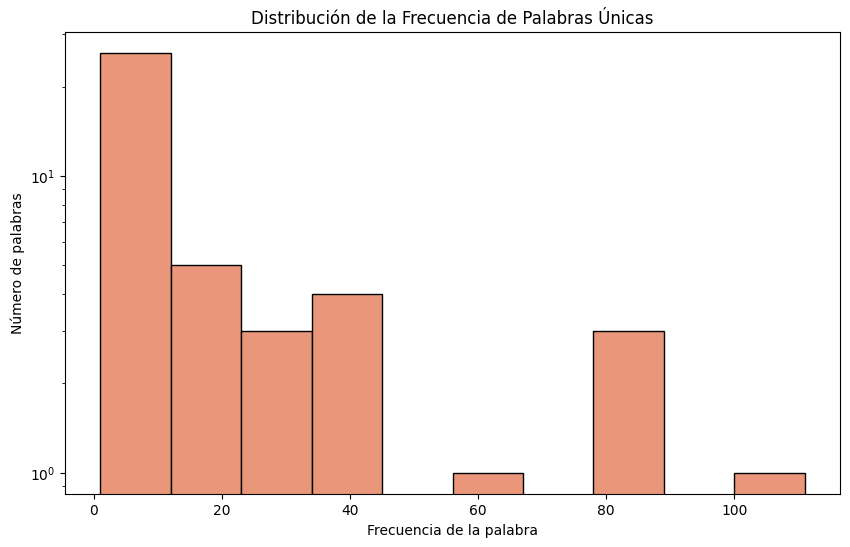

In [ ]:


# Número de palabras únicas
unique_words = set(all_words)
num_unique_words = len(unique_words)
print(f"Número de palabras únicas en el corpus: {num_unique_words}")
word_freq = Counter(all_words)
# Distribución de frecuencia de palabras únicas
unique_word_freq = [word_freq[word] for word in unique_words]

plt.figure(figsize=(10, 6))
plt.hist(unique_word_freq, bins=10, edgecolor='black', color='darksalmon')
plt.title('Distribución de la Frecuencia de Palabras Únicas')
plt.xlabel('Frecuencia de la palabra')
plt.ylabel('Número de palabras')
plt.yscale('log')  # Escala logarítmica para mejor visualización
plt.show()

**Análisis de N-gramas**

In [ ]:
# Creamos el CountVectorizer con las stop_words definidas

vectorizer = CountVectorizer(ngram_range=(2,2)) # 2,2 funciona para crear bigramas. Podes modificar el rango de valores para crear trigramas(3,3).

# Transformamos el texto de la columna ‘descripción’ en n-gramas

X = vectorizer.fit_transform(EIS_quejas['cleaned_review'])

# Extraemos los n-gramas y sus frecuencias

n_grams = vectorizer.get_feature_names_out()

frequencies = X.toarray().sum(axis=0)

# Creamos un diccionario con los n-gramas y sus frecuencias

n_grams_freq = dict(zip(n_grams, frequencies))

# Convertimos el diccionario en un DataFrame

df_n_grams = pd.DataFrame(n_grams_freq.items(), columns=['n_gram', 'frecuencia'])

# Ordenamos el DataFrame en base a la columna de ‘frecuencia’ en orden descendente

df_n_grams = df_n_grams.sort_values(by='frecuencia', ascending=False).reset_index(drop=True)

# Mostramos el DataFrame ordenado

df_n_grams.head(10)

,n_gram,frecuencia
0,someone else,82
1,belongs someone,82
2,information belongs,82
3,used report,34
4,reporting company,34
5,report improperly,34
6,company used,34
7,information incorrect,24
8,account information,22
9,error report,16


**Análisis de la Diversidad Léxica**

In [ ]:

# Número total de palabras en el corpus
num_words = sum(len(sentence) for sentence in EIS_quejas['cleaned_review'])
print(f"Número total de palabras en el corpus: {num_words}")

# Diversidad léxica
lexical_diversity = num_unique_words / num_words
print(f"Diversidad léxica: {lexical_diversity:.4f}")


Número total de palabras en el corpus: 6158
Diversidad léxica: 0.0070


La diversidad lexica es baja  esto se puede presentar porque estamos en un mercado financiero entinces la terminologia va a tender a rtepetirse bastante.

**Visualización de Palabras con Word Cloud**

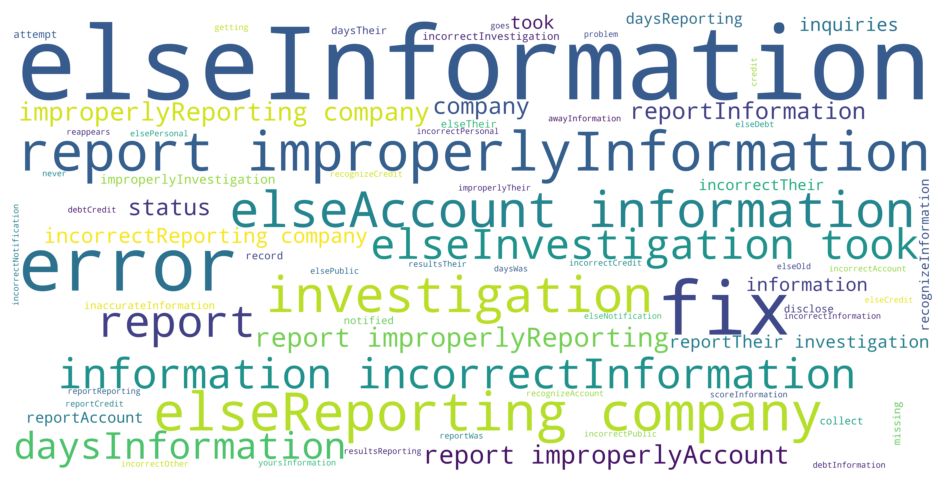

In [ ]:
# Combinamos las reseñas en un solo texto
word_cloud_text = ''.join(EIS_quejas['Sub-issue'].astype(str)) # Access using bracket notation and cast to str

# Definimos las palabras a excluir
custom_stopwords = {'used', 'belongs', 'someone', 'else'}

# Combinamos estas con las stopwords predefinidas
stopwords = STOPWORDS.union(custom_stopwords)

# Generamos la nube de palabras
wordcloud = WordCloud(
    max_font_size=100,
    max_words=100,
    background_color="white",
    scale=10,
    width=800,
    height=400,
    stopwords=stopwords  # Agregamos aca el conjunto de stopwords
).generate(word_cloud_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


El wordcloud muestra omo en la mayoria de casos hablan de que requieren information, onvestigar, error o reportar algun uso inapropiado.

**Estandarización del ranking para el análisis de sentimientos**


Para simplificar el análisis, convertiremos todos los ratings en valores binarios según las siguientes reglas:

-ratings de 4 o 5 seran convertidos a 1 (positivo)

-ratings de 1 o 2 seran convertidos a 0 (negativo)

-ratings de 3 seran removidos del analisis

In [ ]:
EIS_quejas['Rating'] = np.where(EIS_quejas.Rating > 3, 1, 0) #Consideramos como 1 las reviews mayores a 3, sino se considera como 0
EIS_quejas['Rating'].value_counts()

<ipython-input-112-d43f886e4b1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EIS_quejas['Rating'] = np.where(EIS_quejas.Rating > 3, 1, 0) #Consideramos como 1 las reviews mayores a 3, sino se considera como 0


,count
Rating,
0,110
1,80


In [ ]:
# removiendo neutrales
EIS_quejas[EIS_quejas.Rating != 3]

,Complaint ID,Date received,Product,Sub-product,Issue,Sub-issue,Company,State,Submitted via,Date sent to company,Company response to consumer,Timely response?,Rating,cleaned_review,cleaned
0,11092096,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Problem with a company's investigation into an...,Their investigation did not fix an error on yo...,Experian Information Solutions Inc.,NY,Web,12/10/2024,In progress,Yes,0,investigation fix error report,investigation fix error report
11,10904044,11/23/2024,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Account information incorrect,Experian Information Solutions Inc.,TX,Web,11/23/2024,In progress,Yes,0,account information incorrect,account information incorrect
14,11092140,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Experian Information Solutions Inc.,NC,Web,12/10/2024,In progress,Yes,0,information belongs someone else,information belongs someone else
17,10903641,11/23/2024,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Experian Information Solutions Inc.,CA,Web,11/23/2024,In progress,Yes,0,information belongs someone else,information belongs someone else
20,10872982,11/20/2024,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,Experian Information Solutions Inc.,AL,Web,11/20/2024,In progress,Yes,0,debt,debt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,10904205,11/23/2024,Credit reporting or other personal consumer re...,Credit reporting,Incorrect information on your report,Information belongs to someone else,Experian Information Solutions Inc.,AZ,Web,11/23/2024,In progress,Yes,0,information belongs someone else,information belongs someone else
488,11093182,12/10/2024,Debt collection,I do not know,Written notification about debt,Notification didn't disclose it was an attempt...,Experian Information Solutions Inc.,IL,Web,12/10/2024,In progress,Yes,0,notification didnt disclose attempt collect debt,notification didnt disclose attempt collect debt
493,11093199,12/10/2024,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Experian Information Solutions Inc.,IL,Web,12/10/2024,In progress,Yes,0,credit inquiry report dont recognize,credit inquiry report dont recognize
495,10904244,11/23/2024,Credit reporting or other personal consumer re...,Credit reporting,Improper use of your report,Credit inquiries on your report that you don't...,Experian Information Solutions Inc.,MI,Web,11/23/2024,In progress,Yes,1,credit inquiry report dont recognize,credit inquiry report dont recognize


Text(0, 0.5, 'Frecuencia')

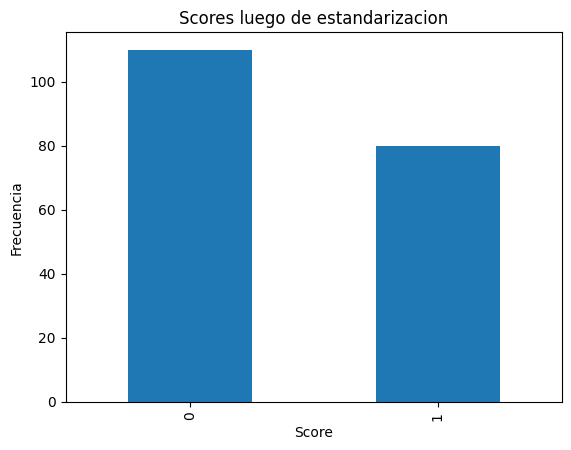

In [ ]:
EIS_quejas.Rating.value_counts().plot.bar()
plt.title('Scores luego de estandarizacion')
plt.xlabel('Score')
plt.ylabel('Frecuencia')

**Preprocesamiento del Texto**


**Tokenización:**

Tokenizar el texto en palabras, frases o párrafos según sea necesario.

**Limpieza del Texto:**

Convertir a minusculas, eliminar caracteres no deseados, stopwords, lematización, y stemming.

**Análisis Léxico y Morfológico:**

Identificación de partes del discurso (POS tagging) y análisis morfológico.

In [ ]:
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Descargamos recursos de NLTK si aún no lo has hecho
nltk.download('stopwords')
nltk.download('wordnet')

# Inicializamos lematizador y lista de stopwords en inglés
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Función para preprocesar el texto
def preprocess_text(text):
    # 1. Eliminar HTML
    text = re.sub(r'<.*?>', '', text)
    # 2. Eliminar caracteres especiales y puntuación
    text = re.sub(r'[^\w\s]', '', text)
    # 3. Convertir a minúsculas y tokenizar
    tokens = text.lower().split()
    # 4. Eliminar stopwords y lematizar
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    # 5. Unir tokens en un solo string limpio
    cleaned_text = ' '.join(tokens)
    return cleaned_text

# Aplicamos la función de preprocesamiento a la columna de texto
EIS_quejas['cleaned']= EIS_quejas['Sub-issue'].apply(preprocess_text)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
<ipython-input-109-5375dd6f4e65>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  EIS_quejas['cleaned']= EIS_quejas['Sub-issue'].apply(preprocess_text)


In [ ]:
#Revisemos si funciono
EIS_quejas[['Sub-issue', 'cleaned']].head(10)

,Sub-issue,cleaned
0,Their investigation did not fix an error on yo...,investigation fix error report
11,Account information incorrect,account information incorrect
14,Information belongs to someone else,information belongs someone else
17,Information belongs to someone else,information belongs someone else
20,Debt is not yours,debt
21,Information belongs to someone else,information belongs someone else
22,Information belongs to someone else,information belongs someone else
23,Investigation took more than 30 days,investigation took 30 day
25,Information belongs to someone else,information belongs someone else
26,Investigation took more than 30 days,investigation took 30 day


**Análisis Sintáctico**

**Parsing:**
Construir árboles sintácticos para las oraciones en el corpus.

**Dependencia Sintáctica:**
Análisis de dependencias para entender las relaciones gramaticales entre palabras.

In [ ]:
# Función para analizar dependencias y relaciones de cada queja
def parse_dependencies(text):
    doc = nlp(text)
    # Extraer tokens con su tipo de dependencia y el token cabeza (head)
    parsed_data = [(token.text, token.dep_, token.head.text) for token in doc]
    return parsed_data

# Tomamos una muestra de las primeras 100 quejas de la columna preprocesada
sample_reviews = EIS_quejas['cleaned'].head(100)

# Aplicamos la función de parsing solo a esta muestra
sample_reviews_dependencies = sample_reviews.apply(parse_dependencies)

# Mostramos un ejemplo de las dependencias en las primeras 100 quejas
print(sample_reviews_dependencies.head())

0     [(investigation, compound, fix), (fix, ROOT, f...
11    [(account, npadvmod, incorrect), (information,...
14    [(information, nsubj, belongs), (belongs, ROOT...
17    [(information, nsubj, belongs), (belongs, ROOT...
20                                 [(debt, ROOT, debt)]
Name: cleaned, dtype: object


**information, nsubj** : "information' 'belongs' es el sujeto nominal (nsubj).

**account, npadvmod, incorrect:** 'account,  incorrect' frase nominal como modificador adverbial (npadvmod).

**investigation, compound, fix:** 'investigation, fix' compuesto (compound).

# **Modelo de regresión logística basado en Bag of Word**

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, accuracy_score


X = EIS_quejas['cleaned']
y = EIS_quejas['Rating']

# Dividimos en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creamos un pipeline de BoW con Naive Bayes
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 4)),
    LogisticRegression(max_iter=800)        # Clasificador lr
)

# Entrenamos el modelo
pipeline.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.5
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.86      0.67        22
           1       0.00      0.00      0.00        16

    accuracy                           0.50        38
   macro avg       0.27      0.43      0.33        38
weighted avg       0.31      0.50      0.39        38



In [ ]:
# Definimos frases de prueba para probar el modelo

test_phrases = [
    'Information belongs to someone else.',
    'Account information incorrect.',
    'Reporting company used your report improperly.',
    'Debt is not yours',
    'Credit inquiries on your report that you do not recognize.',
    'Their investigation did not fix an error on your report.',
    'Investigation took more than 30 days.',
]
# Probamos el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {prediction[0]}")
    print('-' * 50)

Phrase: Information belongs to someone else.
Prediction: 0
--------------------------------------------------
Phrase: Account information incorrect.
Prediction: 0
--------------------------------------------------
Phrase: Reporting company used your report improperly.
Prediction: 0
--------------------------------------------------
Phrase: Debt is not yours
Prediction: 0
--------------------------------------------------
Phrase: Credit inquiries on your report that you do not recognize.
Prediction: 0
--------------------------------------------------
Phrase: Their investigation did not fix an error on your report.
Prediction: 0
--------------------------------------------------
Phrase: Investigation took more than 30 days.
Prediction: 0
--------------------------------------------------


El modelo no es adecuado para este estudio dad que las predicciones son nulas.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = EIS_quejas[['cleaned']]  # Cambiamos a DataFrame
y = EIS_quejas['Rating']
# Aplicamos el submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled['cleaned'], y_resampled, test_size=0.2, random_state=42)

# Creamos un pipeline de BoW con Logistic Regression
pipeline = make_pipeline(
    CountVectorizer(ngram_range=(1, 4)),
    LogisticRegression(max_iter=800)
)

# Entrenamos el modelo con los datos balanceados
pipeline.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = pipeline.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.48      0.81      0.60        16

    accuracy                           0.47        32
   macro avg       0.44      0.47      0.40        32
weighted avg       0.44      0.47      0.40        32



Al comparar los dos modelos (antes y después del balanceo de clases), el primero alcanzó una precisión global mayor que el segundo (50% vs 46.87%), con un mejor desempeño en la clasificación de quejas con calificacion positivas respecto a las negativas. Sin embargo, el segundo modelo tuvo una precisión global pero mostró un balance más equitativo entre ambas clases, con f1-scores de 0.33 para el primero y 0.40 para el segundo y una distribución más uniforme en términos de precision y recall. Esto sugiere que, aunque el primer modelo es más preciso en general, el segundo ofrece una mejor estabilidad y equidad en la clasificación de las clases.

In [ ]:
# Definimos frases de prueba para probar el modelo

test_phrases = [
    'Information belongs to someone else.',
    'Account information incorrect.',
    'Reporting company used your report improperly.',
    'Debt is not yours',
    'Credit inquiries on your report that you do not recognize.',
    'Their investigation did not fix an error on your report.',
    'Investigation took more than 30 days.',
]
# Probamos el modelo con diferentes frases y mostrar las predicciones
for phrase in test_phrases:
    prediction = pipeline.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {prediction[0]}")
    print('-' * 50)

Phrase: Information belongs to someone else.
Prediction: 0
--------------------------------------------------
Phrase: Account information incorrect.
Prediction: 0
--------------------------------------------------
Phrase: Reporting company used your report improperly.
Prediction: 0
--------------------------------------------------
Phrase: Debt is not yours
Prediction: 0
--------------------------------------------------
Phrase: Credit inquiries on your report that you do not recognize.
Prediction: 0
--------------------------------------------------
Phrase: Their investigation did not fix an error on your report.
Prediction: 0
--------------------------------------------------
Phrase: Investigation took more than 30 days.
Prediction: 0
--------------------------------------------------


El modelo de regresión logística basado en la representación Bag of Words, luego de haberse aplicado un submuestreo de la clase mayoritaria no ha mejorado la precisión en la clasificación de quejas. Eso significa que os resultados del modelo no son buenos debido a que la prediccion no es correcta de las frases.

**Modelo de regresión logística basado en Tf-IDF**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer  # Usamos TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler

X = EIS_quejas[['cleaned']] #Cambiamos a dataframe
y = EIS_quejas['Rating']

# Aplicamos el submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled['cleaned'], y_resampled, test_size=0.2, random_state=42)

# Creamos un pipeline de TF-IDF con Logistic Regression
pipeline_tf = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 4)),  # Usamos TfidfVectorizer
    LogisticRegression(max_iter=800)
)

# Entrenamos el modelo con los datos balanceados
pipeline_tf.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred = pipeline_tf.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))


Accuracy: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.48      0.81      0.60        16

    accuracy                           0.47        32
   macro avg       0.44      0.47      0.40        32
weighted avg       0.44      0.47      0.40        32



In [ ]:
# Probamos el modelo con diferentes frases y mostramos las predicciones
for phrase in test_phrases:
    prediction = pipeline_tf.predict([phrase])
    print(f"Phrase: {phrase}")
    print(f"Prediction: {prediction[0]}")
    print('-' * 50)

Phrase: Information belongs to someone else.
Prediction: 0
--------------------------------------------------
Phrase: Account information incorrect.
Prediction: 0
--------------------------------------------------
Phrase: Reporting company used your report improperly.
Prediction: 1
--------------------------------------------------
Phrase: Debt is not yours
Prediction: 0
--------------------------------------------------
Phrase: Credit inquiries on your report that you do not recognize.
Prediction: 0
--------------------------------------------------
Phrase: Their investigation did not fix an error on your report.
Prediction: 0
--------------------------------------------------
Phrase: Investigation took more than 30 days.
Prediction: 1
--------------------------------------------------


Al comparar los resultados obtenidos con TF-IDF y Bag of Words, se observó que el modelo con TF-IDF  no es superior al modelo basado en Bag of Words en términos de precisión global ambos con 46.87%,  TF-IDF mejoró el desempeño en la clasificación de quejas, logrando la prediccion de dos frases.

**Una alternativa: Modelo de Random Forest basado en TF-IDF**

In [ ]:

X = EIS_quejas[['cleaned']]
y = EIS_quejas['Rating']

# Aplicamos el submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled['cleaned'], y_resampled, test_size=0.2, random_state=42)

# Creamos un pipeline de TF-IDF con RandomForest
pipeline_rf = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 4)),
    RandomForestClassifier(n_estimators=100, random_state=42)
)

# Entrenamos el modelo con los datos balanceados
pipeline_rf.fit(X_train, y_train)

# Predecimos en el conjunto de prueba
y_pred_rf = pipeline_rf.predict(X_test)

# Evaluamos el modelo
print(f'Accuracy: {accuracy_score(y_test, y_pred_rf)}')
print('Classification Report:')
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.48      0.81      0.60        16

    accuracy                           0.47        32
   macro avg       0.44      0.47      0.40        32
weighted avg       0.44      0.47      0.40        32



El modelo Random Forest mostró un rendimiento  casi identico  al modelo con TF-IDF

**Optimización del modelo de regresión logística basado en TF-IDF**

In [ ]:
from sklearn.model_selection import GridSearchCV

X = EIS_quejas[['cleaned']]  # Cambiamos a DataFrame
y = EIS_quejas['Rating']

# Aplicamos el submuestreo de la clase mayoritaria
under_sampler = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = under_sampler.fit_resample(X, y)

# Dividimos los datos balanceados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled['cleaned'], y_resampled, test_size=0.2, random_state=42)

# Creamos el pipeline con TfidfVectorizer y LogisticRegression
pipeline = make_pipeline(
    TfidfVectorizer(ngram_range=(1, 4)),
    LogisticRegression(random_state=42)
)

# Definimos los hiperparámetros a ajustar
param_grid = {
    'logisticregression__C': [1, 10],            # Solo dos valores de C porque sino tarda mucho en ejecutar
    'logisticregression__solver': ['liblinear'],  # Solo un solver
    'logisticregression__max_iter': [200]        # Solo una opción de max_iter
}

# Creamos el objeto GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, verbose=1)

# Entrenamos el modelo con GridSearchCV
grid_search.fit(X_train, y_train)

# Vemos los mejores parámetros encontrados
print("Best Parameters: ", grid_search.best_params_)

# Evaluamos el modelo con los mejores parámetros
y_pred = grid_search.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print('Classification Report:')
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters:  {'logisticregression__C': 1, 'logisticregression__max_iter': 200, 'logisticregression__solver': 'liblinear'}
Accuracy: 0.46875
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.12      0.19        16
           1       0.48      0.81      0.60        16

    accuracy                           0.47        32
   macro avg       0.44      0.47      0.40        32
weighted avg       0.44      0.47      0.40        32



Los resultados del ajuste de hiperparámetros fueron iguales a los anteriores.

## **Conclusiones**

El objetivo de este proyecto fue desarrollar un modelo de análisis de sentimientos capaz de clasificar automáticamente las quejas  de los consumidores para diferentes empresas financieras o de cobranza, para proporcionar información valiosa sobre los aspectos que impactan la experiencia de los consumidores y cuales son los problemas de mayor impacto. Se exploraron y probaron diversas técnicas: comenzamos con un modelo de Regresión Logística utilizando la técnica de Bag of Words, y luego probamos la representación de texto mediante TF-IDF. Los rendimientos entre los modelos fueron muy similar sin embargo, con las prdiciones es un poco mejor el segundo modelo.